# Exercício 8 - Visão Computacional
## Tomás Ferranti
## Prof. Moacyr Alvim Horta Barbosa da Silva

Este notebook se encontra atualizado no link do [GitHub](https://github.com/TomasFerranti/ComputerVisionCourse/tree/main/Exercicio8) juntamente com os pacotes necessários para executá-lo.

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

### Questão 1

1) Use a transformada de Hough para estimar o número de varetas na imagem “jogo-dos-palitos.png”. Escolha os parâmetros da transformada para que o código seja capaz de contar razoavelmente bem.

Podemos usar a função HoughLinesP combinada com a detecção de arestas para detectar todas as possíveis linhas. Variei os parâmetros de entrada (principalmente threshold, minLineLength e maxLineGap) dessa função manualmente até ele ficar razoavelmente ok.

Após esse processo, para decidir o número de varetas, comparei a inclinação de cada segmento removendo os semelhantes para uma contagem final correta.

Foram encontradas aproximadamente $20$ varetas através deste método.

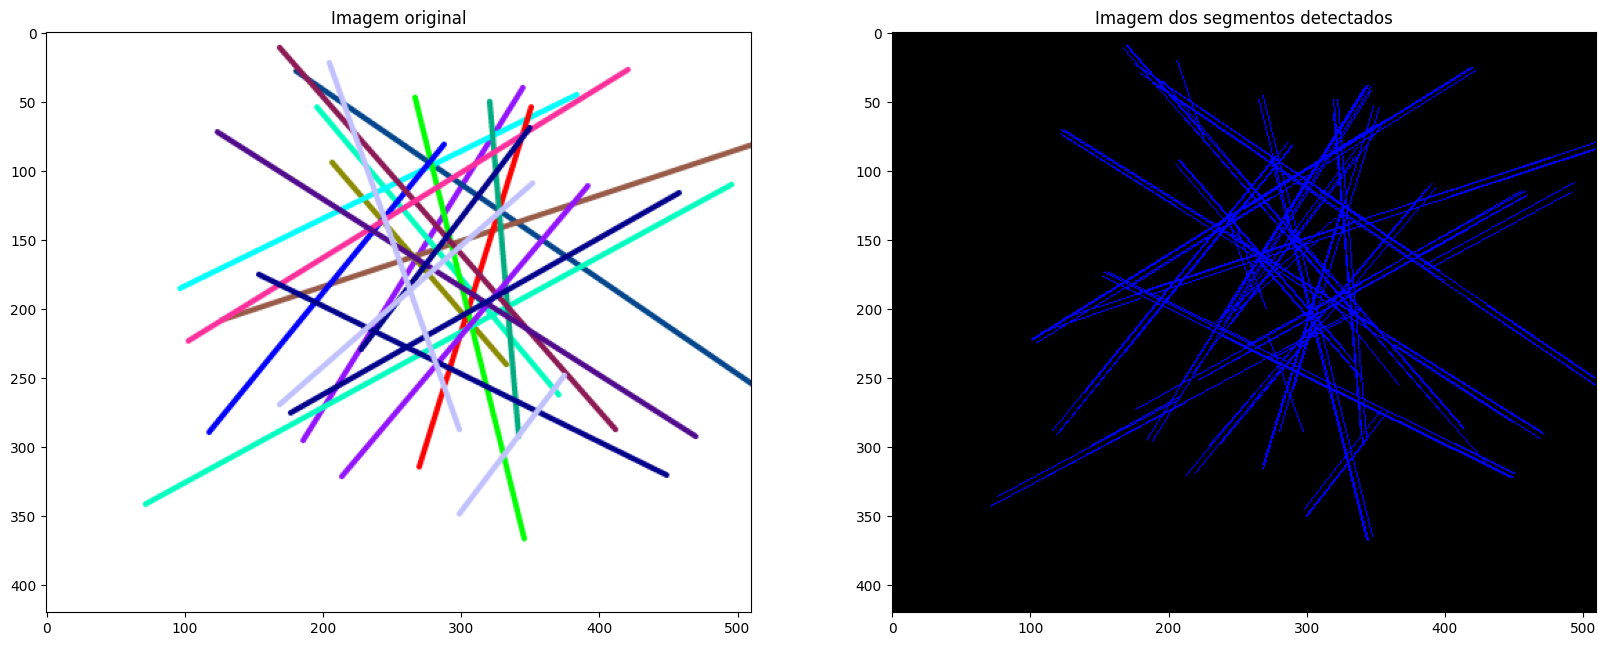

In [2]:
# Questao 1

# Carregar a imagem e passar um filtro gaussiano nela cinza
image1 = cv.imread("content/jogo-dos-palitos.png")
gray1 = cv.cvtColor(image1, cv.COLOR_BGR2GRAY)
blur1 = cv.GaussianBlur(gray1, (5, 5), 0)

# Canny para detecção de arestas + hough para detecção de linhas
edges1 = cv.Canny(blur1, 50, 200, apertureSize=3)    
lines1 = cv.HoughLinesP(image=edges1,        # imagem binaria de arestas
                        rho=1,               # resolucao do parametro de distância rho da grade de acumuladores em pixels
                        theta=np.pi / 180,   # resolucao do parametro de ângulo theta da grade de acumuladores em radianos.
                        threshold=20,        # o valor do limiar que determina a quantidade mínima de votos necessários para uma linha ser considerada
                        # valores mais altos desse parametro resultarao em menos linhas detectadas
                        minLineLength=50,    # comprimento mínimo de uma linha a ser considerada
                        maxLineGap=20        # é a lacuna máxima permitida entre segmentos para serem conectados em uma única linha
                        ).reshape(-1, 4)

# Desenhar linhas na imagem preta
image1lines = np.zeros_like(image1)
for p0x, p0y, p1x, p1y in lines1:
    cv.line(image1lines, (p0x, p0y), (p1x, p1y), (0, 0, 255), 1)

# Plotar as duas imagens
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(image1)
ax[0].set_title("Imagem original")
ax[1].imshow(image1lines)
ax[1].set_title("Imagem dos segmentos detectados")
plt.show()

In [3]:
# Normalizar entradas 
l = lines1.copy()
min_x = np.min(l[:,np.array([0,2])], axis=1)
min_y = np.min(l[:,np.array([1,3])], axis=1)
l[:, 0] -= min_x
l[:, 1] -= min_y
l[:, 2] -= min_x
l[:, 3] -= min_y
max_l = np.max(l)
l = np.round(255 * (l.astype("float") / max_l)).astype("int16")

# Criar uma imagem separada para cada segmento de tamanho 40x40 que o represente corretamente
images = []
for i in range(l.shape[0]):
    p0x, p0y, p1x, p1y = l[i, :]
    image = np.zeros((40, 40, 3)).astype("int8")
    cv.line(image, (p0x, p0y), (max_l * p1x, max_l * p1y), (0, 0, 255), 1)
    images.append(image)

# Criar uma matriz de métrica de diferença entre as imagens dos segmentos
n_images = len(images)
images_matrix_diff = np.zeros((n_images, n_images))
for i in range(n_images):
    for j in range(n_images):
        images_matrix_diff[i,j] = np.sum(np.abs(images[i] - images[j]))

# Ver quais valores cruzados diferentes da diagonal dessa matriz retornaram 0 e remover da contagem
remove_from_count = []
for i in range(n_images):
    if i not in remove_from_count:
        for j in range(n_images):
            if i != j and images_matrix_diff[i,j] == 0:
                remove_from_count.append(j)

n_sticks = n_images - len(remove_from_count)
print(f"Quantidade estimada de varetas: {n_sticks}")

Quantidade estimada de varetas: 20


### Questão 2

2) Use a transformada de Hough para estimar o número de hemácias na imagem “Hemacias.jpg”. Escolha os parâmetros da transformada para que o código seja capaz de contar razoavelmente bem.

Podemos usar a função HoughCircles para detectar todos os possíveis círculos que representam hemácias através da transformada de Hough. Variei os parâmetros de entrada (principalmente param2, minDist, minRadius e maxradius) dessa função manualmente até ele ficar razoavelmente ok.

Após esse processo, para decidir o número de hemácias, basta contar a quantidade de círculos.

Foram encontradas aproximadamente $209$ hemácias através deste método.

Quantidade estimada de círculos: 209


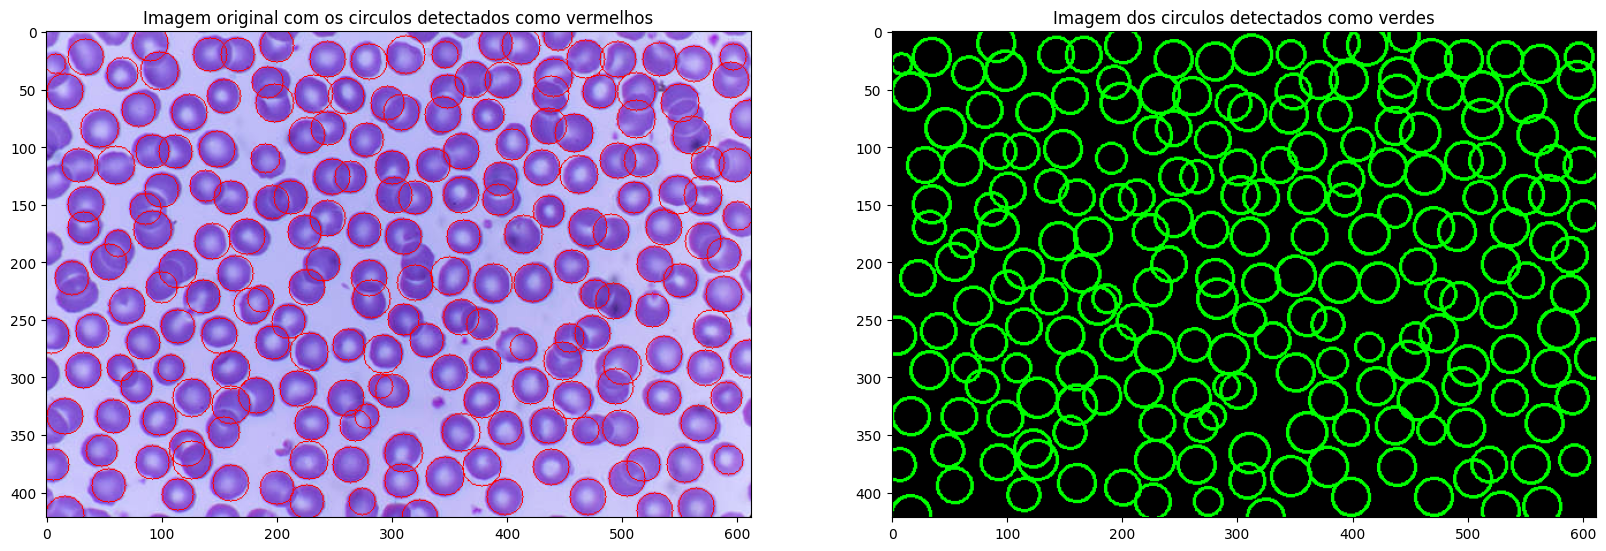

In [4]:
# Questao 2

# Carregar a imagem e passar um filtro gaussiano nela cinza
image2 = cv.imread("content/Hemacias.jpg")
gray2 = cv.cvtColor(image2, cv.COLOR_BGR2GRAY)
blur2 = cv.GaussianBlur(gray2, (5, 5), 0)

# Aplicar a transformada de Hough para deteccao de circulos
circles = cv.HoughCircles(
    blur2,             # imagem de entrada
    cv.HOUGH_GRADIENT, # metódo de detecção
    dp=1,              # resolucao do parametro da razao inversa entre a grade de acumuladores e a imagem em pixels
    param1=200,        # limiar superior do detector de arestas Canny
    param2=15,         # limiar para a deteccao de centros (menor = mais circulos)
    minDist=9,         # distancia minima entre os centros dos circulos
    minRadius=5,       # raio minimo para os circulos
    maxRadius=18       # raio maximo para os circulos
)

# Converter os parametros para inteiros
circles = np.round(circles[0, :]).astype(int)
num_circles = circles.shape[0]
print(f"Quantidade estimada de círculos: {num_circles}")

# Desenhar os circulos detectados em uma imagem preta
image2circles = np.zeros_like(image2)
for (x, y, r) in circles:
    cv.circle(image2, (x, y), r, (255, 0, 0), 1)
    cv.circle(image2circles, (x, y), r, (0, 255, 0), 2)

# Plotar as duas imagens
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(image2)
ax[0].set_title("Imagem original com os circulos detectados como vermelhos")
ax[1].imshow(image2circles)
ax[1].set_title("Imagem dos circulos detectados como verdes")
plt.show()

### Questão 3

3) Implemente uma variação da transformada de Hough para retas: cada pixel da imagem deve gerar uma senoide da imagem $\theta \times \rho$ (sinograma) com intensidade proporcional à intensidade do pixel. Aplique esta transformada à imagem “baldtin1000pb.png”, com resolução nas colunas $\theta \in [0,\pi]$ com $100$ pontos e resolução nas colunas $\rho \in [0,820]$ com $82$ pontos.

A imagem em questão possui dimensões $1000 \times 820$ e para valores de $\theta \in [0,\pi]$ podemos ter raios negativos na imagem. Logo, redefina o intervalo de $rho$ para $[-r, r]$ com $2r+1$ pontos, onde $r = \sqrt{820^2 + 1000^2} \approx 1293$.

Com isso, podemos criar dois espaços de $\theta$ e $\rho$. Em cada iteração ao longo de um pixel da imagem, achamos para cada valor de $\theta$ o valor de $\rho$ correspondente à reta que passa por aquele ponto e adicionamos naquela coordenada $(\theta, \rho)$ do sinograma o valor da intensidade do pixel.

In [5]:
# Questao 3

# Carregar a imagem e passar um filtro gaussiano nela cinza
image3 = cv.imread("content/baldtin1000pb.png")
gray3 = cv.cvtColor(image3, cv.COLOR_BGR2GRAY)
blur3 = cv.GaussianBlur(gray3, (5, 5), 0)

# Distancia maxima de rho
height, width = blur3.shape
max_distance = int(np.sqrt(height**2 + width**2))

# Resolução de theta
n_theta = 100
theta_bins = np.linspace(0, np.pi, n_theta)
theta_cos = np.cos(theta_bins)
theta_sin = np.sin(theta_bins)

# Criação do sinograma
sinogram = np.zeros((n_theta, 2*max_distance))

# Loop pelos pixels da imagem
for y in range(height):
    for x in range(width):
        intensity = blur3[y, x]

        # Considera apenas os pixels com intensidade maior que zero
        if intensity > 0:
            # Cálculo do raio (distância) usando a equação da reta polar
            r = np.round(x * theta_cos + y * theta_sin).astype("int") + max_distance

            # Para cada par (theta, r) acrescenta valor do pixel à uma das retas que passa por ele
            for theta_i in range(n_theta):
                sinogram[theta_i, r[theta_i]] += intensity

# Transformar sinograma em uma imagem
sinogram = np.floor(255 * sinogram / np.max(sinogram)).astype("uint8")

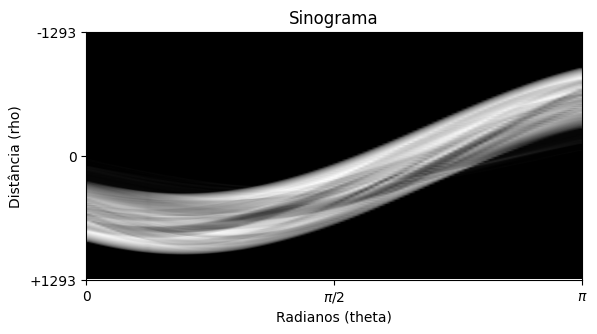

In [6]:
# Exibir o sinograma em uma escala adequada para compreensão
sinogram_plot = sinogram.T
sinogram_plot = cv.resize(sinogram_plot, (1000, 500))

# Imagem e título
fig, ax = plt.subplots()
ax.imshow(sinogram_plot, cmap='gray')
ax.set_xlabel('Radianos (theta)')
ax.set_ylabel('Distância (rho)')
plt.title('Sinograma')

# Valores e labels do eixo x
ax.xaxis.set_major_locator(plt.MaxNLocator(3))
ax.set_xticks([0, 500, 1000])
ax.set_xticklabels([r"0", r"$\pi/2$", r"$\pi$"])

# Valores e labels do eixo y
ax.yaxis.set_major_locator(plt.MaxNLocator(3))
ax.set_yticks([0, 250, 500])
ax.set_yticklabels([f"-{max_distance}", "0", f"+{max_distance}"])

plt.show()

### Questão 4

Fixando $(\theta, \rho)$ arbitrários, considere o conjunto $A(\theta, \rho) = \{(x,y) \in \mathbb{R}^2 | x \cos{\theta} + y \sin{\theta} = \rho\}$. 

Este conjunto contém todos os pontos da imagem que satisfazem a representação polar da reta fixada por $\theta$ e $\rho$. 

O sinograma, $S(\theta, \rho)$, representa a acumulação dos valores de intensidade da imagem, ou seja, somamos todos os pixels da imagem que estão nessa reta.

Portanto, podemos definir $S(\theta, \rho)$ em função de $I(x, y)$ como

$$
S(\theta, \rho) = \sum_{(x,y) \in A(\theta, \rho)} I(x,y) \text{ onde } A(\theta, \rho) = \{(x,y) \in \mathbb{R}^2 | x \cos{\theta} + y \sin{\theta} = \rho\}
$$